In [20]:
import random as rand
import pandas as pd
import numpy as np
samples = 1000

age_m = 58.0
age_std = 9.0


bun_m = 16.0
bun_std = 6.5

creatine_m = 1.1
creatine = 0.3

inr_m = 1.2
inr_std = 0.1

survived = pd.DataFrame()
survived['Age'] = np.random.normal(loc=age_m,scale=age_std,size=samples)
survived['Gender'] = np.random.binomial(1, 0.367, size=samples)
survived['Blood Urea Nitrogen'] = np.random.normal(loc=bun_m,scale=bun_std,size=samples)
survived['Cardiovascular History'] = np.random.binomial(1, 0.291, size=samples)
survived['Neurological History'] = np.random.binomial(1, 0.16, size=samples)
survived['Int Norm Ratio'] = np.random.normal(loc=inr_m,scale=inr_std,size=samples)

In [21]:
survived

,Age,Gender,Blood Urea Nitrogen,Cardiovascular History,Neurological History,Int Norm Ratio
0,44.497615,0,14.894351,0,0,1.362896
1,71.512056,0,13.440489,1,0,1.365562
2,52.067068,1,5.215250,0,0,1.271947
3,64.201606,0,17.481410,1,0,1.191404
4,58.035124,0,10.350031,0,0,1.287058
...,...,...,...,...,...,...
995,61.301074,0,11.507231,0,0,1.193990
996,68.830969,1,27.179549,0,0,1.235002
997,59.537947,0,27.332955,0,0,1.100343
998,56.478403,0,12.148434,0,0,1.161887


In [22]:
age_m = 72.5
age_std = 8.25


bun_m = 30.0
bun_std = 9.0

creatine_m = 1.5
creatine = 0.4

inr_m = 1.3
inr_std = 0.1

deceased = pd.DataFrame()
deceased['Age'] = np.random.normal(loc=age_m,scale=age_std,size=samples)
deceased['Gender'] = np.random.binomial(1, 0.646, size=samples)
deceased['Blood Urea Nitrogen'] = np.random.normal(loc=bun_m,scale=bun_std,size=samples)
deceased['Cardiovascular History'] = np.random.binomial(1, 0.709, size=samples)
deceased['Neurological History'] = np.random.binomial(1, 0.840, size=samples)
deceased['Int Norm Ratio'] = np.random.normal(loc=inr_m,scale=inr_std,size=samples)

In [23]:
deceased

,Age,Gender,Blood Urea Nitrogen,Cardiovascular History,Neurological History,Int Norm Ratio
0,85.627769,0,25.387063,1,1,1.283452
1,62.446935,1,33.633249,0,1,1.159156
2,89.110973,0,27.574008,0,0,1.328641
3,59.589993,1,22.115080,0,1,1.336103
4,68.699775,1,20.978994,0,1,1.305511
...,...,...,...,...,...,...
995,73.392435,1,31.962392,0,1,1.337616
996,68.256903,1,24.256785,1,1,1.282099
997,66.041620,0,26.281509,0,1,1.376349
998,75.073430,1,22.618184,1,1,1.398455


In [25]:
import plotly.express as px
survived['class'] = 'Survived'
deceased['class'] = 'Deceased'
train = pd.concat([survived, deceased])
for cols in train.columns:
    fig = px.histogram(train, x = cols, color = 'class')
    fig.show()

In [26]:
from pycaret.classification import *

C:\Users\chags\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\chags\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\chags\anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning:

pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [42]:
train = train.sample(frac=1).reset_index(drop=True)
train['class'] = train['class'].replace('Survived', 0)
train['class'] = train['class'].replace('Deceased', 1)

In [43]:
exp = setup(train, target = 'class', silent=True)

,Description,Value
0,session_id,1873
1,Target,class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2000, 7)"
5,Missing Values,0
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [135]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9071,0.9073,0.9028,0.9155,0.9091,0.8142,0.8143
1,0.9143,0.9142,0.9167,0.9167,0.9167,0.8284,0.8284
2,0.9071,0.9081,0.8750,0.9403,0.9065,0.8145,0.8166
3,0.9214,0.9217,0.9014,0.9412,0.9209,0.8429,0.8437
4,0.9143,0.9147,0.8873,0.9403,0.9130,0.8287,0.8300
5,0.9214,0.9221,0.8732,0.9688,0.9185,0.8430,0.8473
6,0.9143,0.9141,0.9296,0.9041,0.9167,0.8285,0.8288
7,0.9000,0.8994,0.9437,0.8701,0.9054,0.7997,0.8027
8,0.9500,0.9499,0.9577,0.9444,0.9510,0.9000,0.9001
9,0.8921,0.8919,0.9014,0.8889,0.8951,0.7840,0.7841


In [45]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

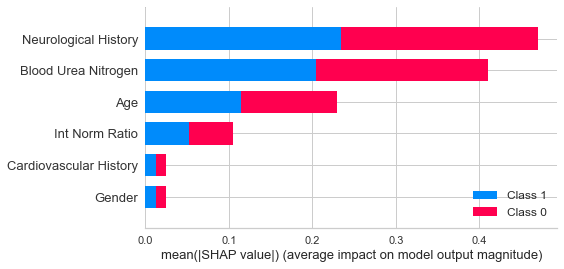

In [46]:
interpret_model(dt)

In [47]:
interpret_model(dt, plot = 'reason', observation = 0)

In [50]:
interpret_model(dt, plot = 'reason', observation = 1)

In [51]:
interpret_model(dt, plot = 'reason', observation = 2)

In [52]:
interpret_model(dt, plot = 'reason', observation = 3)

In [75]:
interpret_model(dt, plot = 'reason')

In [74]:
import shap
N = 100
explainer = shap.KernelExplainer(model = dt.predict_proba, data = get_config('X_train'), link = "identity")
shap_value_single = explainer.shap_values(X = survived.drop(['class'], axis=1).iloc[N], nsamples = 10)
shap.force_plot(base_value = explainer.expected_value[0],
                shap_values = shap_value_single[0],
                features = survived.drop(['class'], axis=1).iloc[0],
                )

Using 1399 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [73]:
N = 50
explainer = shap.KernelExplainer(model = dt.predict_proba, data = get_config('X_train'), link = "identity")
shap_value_single = explainer.shap_values(X = deceased.drop(['class'], axis=1).iloc[N], nsamples = 10)
shap.force_plot(base_value = explainer.expected_value[0],
                shap_values = shap_value_single[0],
                features = deceased.drop(['class'], axis=1).iloc[0],
                )

Using 1399 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [94]:
deceased.mean()

Age                       72.568825
Gender                     0.668000
Blood Urea Nitrogen       29.971934
Cardiovascular History     0.716000
Neurological History       0.834000
Int Norm Ratio             1.296833
dtype: float64

In [95]:
survived.mean()

Age                       58.120558
Gender                     0.368000
Blood Urea Nitrogen       15.718305
Cardiovascular History     0.329000
Neurological History       0.155000
Int Norm Ratio             1.205179
dtype: float64

In [137]:
abc = pd.DataFrame({"Age": [72], "Gender":[1],"Blood Urea Nitrogen":[20], "Cardiovascular History":[1], "Neurological History":[1], "Int Norm Ratio":[1.29]})

In [138]:
explainer = shap.KernelExplainer(model = dt.predict_proba, data = get_config('X_train'), link = "identity")
shap_value_single = explainer.shap_values(X = abc)
shap.force_plot(base_value = explainer.expected_value[0],
                shap_values = shap_value_single[0], features=abc
                )

Using 1399 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

In [140]:
explainer

In [141]:
save_model(dt, 'DT_COVID')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', max_depth=None,
                        

In [142]:
train.to_csv('COVID_TRAIN.csv')